# Feature importance based on Minimum Redundancy Maximum Relevance (MRMR) and Extra Tree (ET) criteria

This file will identify the most important 20 features (i.e. questions) in the DASS-42 (Depression Anxiety and Stress Scale-42). 

Feature selection is done to select the questions that were best to predict whether participants’ final anxiety scores were at the low or high class.

# 1. Feature selection based on Minimum Redundancy Maximum Relevance (MRMR) criteria
Firstly, import the necessary libraries and define constants.

In [6]:
# Import libraries
import os
# import pymrmr # Not available anymore. Use the customized function instead.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# from skfda.preprocessing.dim_reduction import variable_selection
# import skfda
# import numpy as np
# import dcor

import numpy as np
from sklearn.metrics import mutual_info_score


In [7]:
# Define data folder
data_folder = "./data"
show_top = 20

Using the one-hot encoded features dataset, print the minimum number (20) of useful features using mRMR. 

To see all of the features and their corresponding mRMR scores: Run Jupyter Notebook through a CLI (Anaconda Prompt for Windows or your built-in command line applications for MacOS or Linux).

In [8]:
# One-hot encoded dataset
# Load data
########################## Customized MRMR Approach ##########################

# def MRMR(X, y, k):
#     n_samples, n_features = X.shape
#     S = [i for i in range(n_features)] 
#     F = []

#     MIf = np.zeros(n_features)
#     for i in range(n_features):
#         f = X[:, i]
#         MIf[i] = mutual_info_score(y,f)
    
#     f_star = np.argmax(MIf)
#     F.append(f_star)
#     S.remove(f_star)
    
#     while len(F) < k:
#         mrmr = np.zeros(len(S))
#         for i, f in enumerate(S):
#             f_s = F + [f]
#             mrmr[i] = MIf[f] - np.mean([MIf[j] for j in f_s])
        
#         f_star = S[np.argmax(mrmr)]
#         F.append(f_star)
#         S.remove(f_star)
#     return F

# train_feats = pd.read_csv(os.path.join(data_folder, "features.csv"))
# train_feats = train_feats.drop(["age_norm", "gender_m", "gender_f", "region_other", "region_east", "region_west"], axis=1)  # Comment this line to include demographics
# labels = pd.read_csv(os.path.join(data_folder, "labels.csv"))

# print(MRMR(train_feats.to_numpy(), labels.to_numpy().ravel(), show_top))

########################## From Library ##########################
import mrmr
from mrmr import mrmr_classif


train_feats = pd.read_csv(os.path.join(data_folder, "features.csv"))
train_feats = train_feats.drop(["age_norm", "gender_m", "gender_f", "region_other", "region_east", "region_west"], axis=1)  # Comment this line to include demographics
labels = pd.read_csv(os.path.join(data_folder, "labels.csv"))

labels = labels["anxiety_status"]

selected_features = mrmr_classif(X=train_feats, y=labels, K=show_top)
print(selected_features)

########################## Depreciated Code ##########################
# # Check for any completely NaN columns
# print(train_feats.isna().all())

# # Check for any columns with zero variance
# print(train_feats.nunique(dropna=False))
# # Removing columns that are entirely NaN or have zero variance
# train_feats = train_feats.dropna(axis=1, how='all')  # Drops columns where all values are NaN
# train_feats = train_feats.loc[:, train_feats.nunique(dropna=False) > 1]  # Drop columns with zero variance
# # Fill NaN values, for example, with the mean of each column
# train_feats.fillna(train_feats.mean(), inplace=True)

# train_feats = train_feats.to_numpy()
# labels = labels.to_numpy()

# # Ensure `labels` is properly shaped for scikit-learn
# if labels.ndim > 1:
#     labels = labels.ravel()

# feat_selector = mifs.MutualInformationFeatureSelector(method='MRMR', n_features=show_top)

# try:
#     feat_selector.fit(train_feats, labels)
#     print("Features selected:", feat_selector.support_)
# except Exception as e:
#     print("An error occurred during feature selection:", e)


# mrmr = variable_selection.MinimumRedundancyMaximumRelevance(
#     n_features_to_select=3,
#     method="MID",
# )
# _ = mrmr.fit(train_feats, labels)
# point_mask = mrmr.get_support()
# points = train_feats.grid_points[0][point_mask]

# print(_)
# print("Processed dataset:")
# print(pymrmr.mRMR(train_feats, 'MIQ', show_top))

100%|██████████| 20/20 [00:00<00:00, 65.81it/s]

['Q41A_0', 'Q36A_1', 'Q28A_0', 'Q7A_0', 'Q19A_0', 'Q4A_0', 'Q40A_3', 'Q20A_0', 'Q25A_0', 'Q9A_3', 'Q36A_0', 'Q15A_0', 'Q30A_0', 'Q12A_0', 'Q36A_3', 'Q23A_0', 'Q11A_3', 'Q22A_0', 'Q2A_0', 'Q33A_0']


Using the not one-hot encoded dataset, print the minimum number (20) of useful features using mRMR.

In [9]:
# Not one-hot encoded dataset
train_feats = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset. Change the file name accordingly if using another dataset.
train_feats = train_feats.drop(["country","gender","age","agegroup","continent","region","anxiety_score", "anxiety_status"], axis=1)

labels = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv"))
labels = labels["anxiety_status"]

# print(MRMR(train_feats.to_numpy(), labels.to_numpy().ravel(), show_top)) # The customized function approach
selected_features = mrmr_classif(X=train_feats, y=labels, K=show_top) # The mrmr library approach
print(selected_features)

# label_encoder = LabelEncoder()
# region = label_encoder.fit_transform(train_feats["region"])
# region = pd.DataFrame(region)
# region.columns = ["region1"]
# train_feats = pd.concat([train_feats, region], axis=1)

# train_feats = train_feats.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
# train_feats = train_feats.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

# print("\nUnprocessed dataset:")
# print(pymrmr.mRMR(train_feats, 'MIQ', show_top))


100%|██████████| 20/20 [00:00<00:00, 70.74it/s]

['Q28A', 'Q25A', 'Q36A', 'Q40A', 'Q41A', 'Q20A', 'Q7A', 'Q9A', 'Q12A', 'Q4A', 'Q30A', 'Q33A', 'Q19A', 'Q15A', 'Q1A', 'Q2A', 'Q29A', 'Q8A', 'Q11A', 'Q13A']


# 2. Feature selection based on the Gini importance of features in an Extra Tree (ET) classifier

This section will use an Extra-Tree Classifier to identify the most important 20 features (i.e., questions) by extracting the Gini importance of each feature from an Extra-Tree Classifier.

Firstly, import the necessary libraries and define the variables used.

In [10]:
# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [11]:
# Define data folder
data_folder = "./data"
show_top = 20

Using the one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

In [12]:
# One-hot encoded dataset
features = pd.read_csv(os.path.join(data_folder, "features.csv"))
labels = pd.read_csv(os.path.join(data_folder, "labels.csv"))
features = features.drop(["gender_m", "gender_f", "region_other", "region_east", "region_west", "age_norm"], axis=1)  # Comment this line to include demographics

In [13]:
# Fit a model for questions plus demographics
model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

ExtraTreesClassifier()

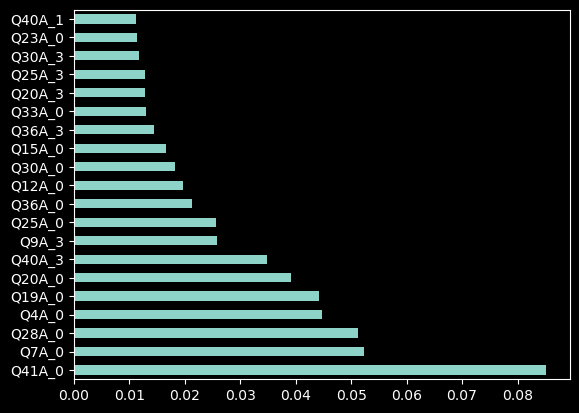

In [14]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
plt.show()

In [15]:
# List top 20 features
print(feat_importances.nlargest(show_top))

Q41A_0    0.085142
Q7A_0     0.052358
Q28A_0    0.051268
Q4A_0     0.044672
Q19A_0    0.044197
Q20A_0    0.039182
Q40A_3    0.034861
Q9A_3     0.025804
Q25A_0    0.025640
Q36A_0    0.021379
Q12A_0    0.019649
Q30A_0    0.018327
Q15A_0    0.016704
Q36A_3    0.014423
Q33A_0    0.012947
Q20A_3    0.012888
Q25A_3    0.012796
Q30A_3    0.011737
Q23A_0    0.011413
Q40A_1    0.011309
dtype: float64


Using the not one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

In [16]:
# Not one-hot encoded dataset
df = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset.
features = df
labels = df["anxiety_status"]

label_encoder = LabelEncoder()
region = label_encoder.fit_transform(features["region"])
region = pd.DataFrame(region)
region.columns = ["region1"]
features = pd.concat([features, region], axis=1)

features = features.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
features = features.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

In [17]:
# Fit a model for questions plus demographics
model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

ExtraTreesClassifier()

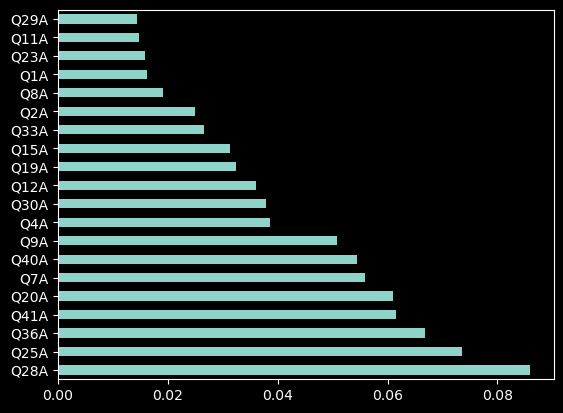

In [18]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
plt.show()

In [19]:
# List top 20 features
print(feat_importances.nlargest(show_top))

Q28A    0.085956
Q25A    0.073574
Q36A    0.066786
Q41A    0.061559
Q20A    0.060990
Q7A     0.055840
Q40A    0.054411
Q9A     0.050878
Q4A     0.038617
Q30A    0.037964
Q12A    0.036005
Q19A    0.032446
Q15A    0.031380
Q33A    0.026543
Q2A     0.025018
Q8A     0.019120
Q1A     0.016305
Q23A    0.015878
Q11A    0.014682
Q29A    0.014315
dtype: float64
